In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

# Preprocess the data
X = df['Review'].values
y = df['Liked'].values

# Encode the labels (Liked column)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 1000  # Adjust as needed
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Adjust as needed
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Build the LSTM model
embedding_dim = 16  # Adjust as needed

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # Adjust as needed
model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')



Epoch 1/5


2024-01-02 19:15:20.202523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 19:15:20.204842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 19:15:20.206145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.4975

2024-01-02 19:15:24.642910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 19:15:24.645410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 19:15:24.647268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 5s 105ms/step - loss: 0.6940 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/5
25/25 [==============================] - 2s 77ms/step - loss: 0.6933 - accuracy: 0.5050 - val_loss: 0.6934 - val_accuracy: 0.4800
Epoch 3/5
25/25 [==============================] - 2s 75ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6937 - val_accuracy: 0.4800
Epoch 4/5
25/25 [==============================] - 2s 90ms/step - loss: 0.6934 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 5/5
7/7 [==============================] - 0s 33ms/step - loss: 0.6938 - accuracy: 0.4800
Test Accuracy: 48.00%


Epoch 1/5
25/25 [==============================] - 2s 82ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6935 - val_accuracy: 0.4800
Epoch 2/5
25/25 [==============================] - 2s 93ms/step - loss: 0.6897 - accuracy: 0.5188 - val_loss: 0.6839 - val_accuracy: 0.5450
Epoch 3/5
25/25 [==============================] - 2s 95ms/step - loss: 0.5650 - accuracy: 0.7450 - val_loss: 0.7555 - val_accuracy: 0.6750
Epoch 4/5
25/25 [==============================] - 2s 85ms/step - loss: 0.4519 - accuracy: 0.8462 - val_loss: 0.6609 - val_accuracy: 0.7350
Epoch 5/5
7/7 [==============================] - 0s 29ms/step - loss: 0.5777 - accuracy: 0.7600
Test Accuracy: 76.00%


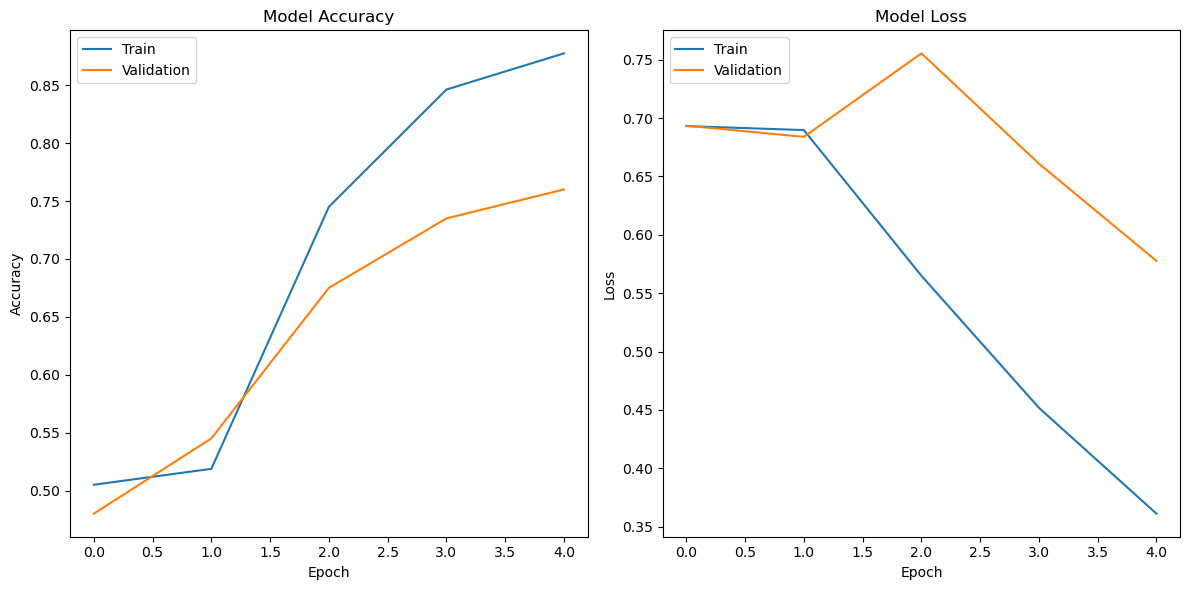

In [4]:
import matplotlib.pyplot as plt


# Train the model and store the training history
history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_history(history)
